# Imports

In [1]:
import torch
from torch.cuda import random
import torch.nn as nn
import torch.nn.functional as F
import os
import torch.optim as optim
from os import listdir
from os.path import isfile, join
from tracin.tracin_batched import save_tracin_checkpoint, load_tracin_checkpoint,  approximate_tracin_batched
import pandas as pd
from LSTM_clean.model import LSTM
import numpy as np
import re
from statistics import mean
import scipy.stats as stats
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from copy import deepcopy
from itertools import product
import time
import pickle
from comparison_helper import get_train_validation, get_train_subset, get_length, get_validation, get_points

# Global Configuration Variables
If you want to run more thorough experiments, increase NUM_TRAIN_SAMPLES, NUM_VAL_SAMPLES and NUM_REPETITIONS

In [2]:
OUTPUT_SIZE = 1743
NUM_TRAIN_SAMPLES = 100
NUM_VAL_SAMPLES = 100
NUM_REPETITIONS = 25
BATCH_SIZE = 4096
train_names = ["random", "diverse", "filter", "breaking"]
test_names = ["random", "breaking", "filter"]

# Obtaining Checkpoints

In [3]:
curr_dir = os.getcwd()
path = curr_dir + "/checkpoints_subset/"
checkpoints = []
with os.scandir(path) as listOfEntries:
    for entry in listOfEntries:
        # print all entries that are files
        if entry.is_file():
            checkpoints.append(os.path.join(path,entry.name))


# Device setting

In [4]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='2'

cpu_device = torch.device("cpu")
print("CPU Device is ", cpu_device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device is ", device)

CPU Device is  cpu
device is  cuda


# Setting up the combos and logging variables

In [5]:
combos = list(product(train_names, test_names))
print("Combos \n ", combos)
aggregate_influences = {}

Combos 
  [('random', 'random'), ('random', 'breaking'), ('random', 'filter'), ('diverse', 'random'), ('diverse', 'breaking'), ('diverse', 'filter'), ('filter', 'random'), ('filter', 'breaking'), ('filter', 'filter'), ('breaking', 'random'), ('breaking', 'breaking'), ('breaking', 'filter')]


# Running all the combinations

In [6]:
for combo in combos:
    TRAIN_NAME = combo[0]
    TEST_NAME = combo[1]
    train, train_labels, valid, valid_labels = get_train_validation(train_dataset=TRAIN_NAME, valid_dataset=TEST_NAME)
    train_lengths = [get_length(i) for i in train]

    train_copy = deepcopy(train)
    train_labels_copy = deepcopy(train_labels)

    influences = []
    start_time = time.time()
    print("About to start running")
    for h in range(NUM_REPETITIONS):
        print(f"Starting outer loop with {h}")
        start_length_time = time.time()
        if len(train_copy) != 0:
            print("About to cartesian product")
            sources, source_labels, targets, target_labels = get_points(train_copy, train_labels_copy, valid, valid_labels, x_num_sample=NUM_TRAIN_SAMPLES, y_num_sample=NUM_VAL_SAMPLES, seed=h)
            print("About to tracin")
            influence = approximate_tracin_batched(LSTM, sources=sources, targets=targets, source_labels=source_labels, target_labels=target_labels, optimizer="SGD", paths=checkpoints, batch_size=BATCH_SIZE, num_items=OUTPUT_SIZE, device=device)
            influences.append(influence)
            end_length_time = time.time()
            print(f"Influence is : {influence} \nTime elapsed {end_length_time-start_length_time}")
        else:
            influences.append(-1)
        outer_end_time = time.time()

        print("_______________________________________________________________________________")


    influences = [float(i) for i in influences]
    print(f"Influences are \n{influences}")
    full_string = TRAIN_NAME + "_" + TEST_NAME
    aggregate_influences[full_string] = influences
    file_name = "train_"+ TRAIN_NAME + "_test_" + TEST_NAME +"_100_100.pkl" 

    with open(file_name, 'wb') as f:
        pickle.dump(influences, f)
    print(f"DONE WITH A COMBO {TRAIN_NAME} {TEST_NAME}")
    print("__________________________________________________________________________________")

Train Dataset random
Valid dataset random
Train set is length: 83807
Validation set is length: 10464
About to start running
Starting outer loop with 0
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 3.0379011631011963
In checkpoint number: 1
Total time for checkpoint 1 : 2.311009168624878
In checkpoint number: 2
Total time for checkpoint 2 : 1.9671697616577148
In checkpoint number: 3
Total time for checkpoint 3 : 2.2216453552246094
In checkpoint number: 4
Total time for checkpoint 4 : 1.857954978942871
In checkpoint number: 5
Total time for checkpoint 5 : 2.3430497646331787
In checkpoint number: 6
Total time for checkpoint 6 : 1.8212430477142334
In checkpoint number: 7
Total time for checkpoint 7 : 1.7915053367614746
In checkpoint number: 8
Total time for checkpoint 8 : 2.441434383392334
In checkpoint number: 9
Total time for checkpoint 9 : 2.347200870513916
In checkpoint number: 10
Total time for checkpoint 10 : 2.272974729537964
In che

Total time for checkpoint 11 : 2.731451988220215
In checkpoint number: 12
Total time for checkpoint 12 : 1.8492398262023926
In checkpoint number: 13
Total time for checkpoint 13 : 1.777921199798584
In checkpoint number: 14
Total time for checkpoint 14 : 2.1010324954986572
In checkpoint number: 15
Total time for checkpoint 15 : 2.2316505908966064
In checkpoint number: 16
Total time for checkpoint 16 : 2.4151058197021484
In checkpoint number: 17
Total time for checkpoint 17 : 2.6301567554473877
In checkpoint number: 18
Total time for checkpoint 18 : 2.0850722789764404
In checkpoint number: 19
Total time for checkpoint 19 : 2.501378297805786
In checkpoint number: 20
Total time for checkpoint 20 : 2.0053555965423584
Total time taken is 49.24844455718994
Influence is : 0.002860615961253643 
Time elapsed 49.53873372077942
_______________________________________________________________________________
Starting outer loop with 5
About to cartesian product
About to tracin
In checkpoint number: 

Total time for checkpoint 0 : 2.2061502933502197
In checkpoint number: 1
Total time for checkpoint 1 : 2.6746363639831543
In checkpoint number: 2
Total time for checkpoint 2 : 2.396505117416382
In checkpoint number: 3
Total time for checkpoint 3 : 2.24306058883667
In checkpoint number: 4
Total time for checkpoint 4 : 2.702049493789673
In checkpoint number: 5
Total time for checkpoint 5 : 2.8445935249328613
In checkpoint number: 6
Total time for checkpoint 6 : 2.750110387802124
In checkpoint number: 7
Total time for checkpoint 7 : 2.940728187561035
In checkpoint number: 8
Total time for checkpoint 8 : 2.0381414890289307
In checkpoint number: 9
Total time for checkpoint 9 : 2.405700445175171
In checkpoint number: 10
Total time for checkpoint 10 : 2.076106548309326
In checkpoint number: 11
Total time for checkpoint 11 : 2.1550474166870117
In checkpoint number: 12
Total time for checkpoint 12 : 2.3457226753234863
In checkpoint number: 13
Total time for checkpoint 13 : 1.9225201606750488
In

Total time for checkpoint 14 : 2.001391887664795
In checkpoint number: 15
Total time for checkpoint 15 : 2.4926321506500244
In checkpoint number: 16
Total time for checkpoint 16 : 2.0495753288269043
In checkpoint number: 17
Total time for checkpoint 17 : 2.25395131111145
In checkpoint number: 18
Total time for checkpoint 18 : 2.32196307182312
In checkpoint number: 19
Total time for checkpoint 19 : 1.7469885349273682
In checkpoint number: 20
Total time for checkpoint 20 : 2.095212936401367
Total time taken is 36.658910274505615
Influence is : 0.00339861074462533 
Time elapsed 36.934855937957764
_______________________________________________________________________________
Starting outer loop with 14
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.8337688446044922
In checkpoint number: 1
Total time for checkpoint 1 : 2.434723377227783
In checkpoint number: 2
Total time for checkpoint 2 : 1.7145273685455322
In checkpoint number: 3
Total 

Total time for checkpoint 3 : 1.9274036884307861
In checkpoint number: 4
Total time for checkpoint 4 : 2.149467706680298
In checkpoint number: 5
Total time for checkpoint 5 : 1.808018445968628
In checkpoint number: 6
Total time for checkpoint 6 : 1.8272700309753418
In checkpoint number: 7
Total time for checkpoint 7 : 2.1173646450042725
In checkpoint number: 8
Total time for checkpoint 8 : 1.7297556400299072
In checkpoint number: 9
Total time for checkpoint 9 : 2.067378520965576
In checkpoint number: 10
Total time for checkpoint 10 : 1.7419700622558594
In checkpoint number: 11
Total time for checkpoint 11 : 1.8799817562103271
In checkpoint number: 12
Total time for checkpoint 12 : 2.0267884731292725
In checkpoint number: 13
Total time for checkpoint 13 : 1.5823922157287598
In checkpoint number: 14
Total time for checkpoint 14 : 1.9055187702178955
In checkpoint number: 15
Total time for checkpoint 15 : 2.4525489807128906
In checkpoint number: 16
Total time for checkpoint 16 : 2.03246831

Total time for checkpoint 17 : 1.984142780303955
In checkpoint number: 18
Total time for checkpoint 18 : 1.6915247440338135
In checkpoint number: 19
Total time for checkpoint 19 : 2.143585205078125
In checkpoint number: 20
Total time for checkpoint 20 : 2.4376683235168457
Total time taken is 42.7146475315094
Influence is : -0.005150218028575182 
Time elapsed 43.060922384262085
_______________________________________________________________________________
Starting outer loop with 23
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.044201612472534
In checkpoint number: 1
Total time for checkpoint 1 : 2.342423439025879
In checkpoint number: 2
Total time for checkpoint 2 : 1.9586114883422852
In checkpoint number: 3
Total time for checkpoint 3 : 1.8901445865631104
In checkpoint number: 4
Total time for checkpoint 4 : 2.3412342071533203
In checkpoint number: 5
Total time for checkpoint 5 : 1.8403332233428955
In checkpoint number: 6
Total tim

Total time for checkpoint 20 : 2.126955270767212
Total time taken is 43.849730014801025
Influence is : 0.0913599506020546 
Time elapsed 44.14987587928772
_______________________________________________________________________________
Starting outer loop with 2
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.4973015785217285
In checkpoint number: 1
Total time for checkpoint 1 : 2.197904348373413
In checkpoint number: 2
Total time for checkpoint 2 : 1.6930551528930664
In checkpoint number: 3
Total time for checkpoint 3 : 1.8201186656951904
In checkpoint number: 4
Total time for checkpoint 4 : 2.5447778701782227
In checkpoint number: 5
Total time for checkpoint 5 : 2.170426845550537
In checkpoint number: 6
Total time for checkpoint 6 : 2.025418996810913
In checkpoint number: 7
Total time for checkpoint 7 : 2.3843374252319336
In checkpoint number: 8
Total time for checkpoint 8 : 2.405320882797241
In checkpoint number: 9
Total time for chec

Total time for checkpoint 9 : 1.7820048332214355
In checkpoint number: 10
Total time for checkpoint 10 : 1.4423787593841553
In checkpoint number: 11
Total time for checkpoint 11 : 1.4289631843566895
In checkpoint number: 12
Total time for checkpoint 12 : 1.9064924716949463
In checkpoint number: 13
Total time for checkpoint 13 : 1.5914685726165771
In checkpoint number: 14
Total time for checkpoint 14 : 1.77449631690979
In checkpoint number: 15
Total time for checkpoint 15 : 2.021756887435913
In checkpoint number: 16
Total time for checkpoint 16 : 1.961686372756958
In checkpoint number: 17
Total time for checkpoint 17 : 2.493847370147705
In checkpoint number: 18
Total time for checkpoint 18 : 1.808579921722412
In checkpoint number: 19
Total time for checkpoint 19 : 1.9577229022979736
In checkpoint number: 20
Total time for checkpoint 20 : 1.4444923400878906
Total time taken is 36.907559633255005
Influence is : 0.05774637311697006 
Time elapsed 37.13953948020935
__________________________

Total time for checkpoint 0 : 2.7447073459625244
In checkpoint number: 1
Total time for checkpoint 1 : 2.1112794876098633
In checkpoint number: 2
Total time for checkpoint 2 : 2.1307570934295654
In checkpoint number: 3
Total time for checkpoint 3 : 2.541968822479248
In checkpoint number: 4
Total time for checkpoint 4 : 2.1266002655029297
In checkpoint number: 5
Total time for checkpoint 5 : 2.398237466812134
In checkpoint number: 6
Total time for checkpoint 6 : 2.0968611240386963
In checkpoint number: 7
Total time for checkpoint 7 : 2.6713509559631348
In checkpoint number: 8
Total time for checkpoint 8 : 2.792323589324951
In checkpoint number: 9
Total time for checkpoint 9 : 2.2922327518463135
In checkpoint number: 10
Total time for checkpoint 10 : 2.128903865814209
In checkpoint number: 11
Total time for checkpoint 11 : 2.5151007175445557
In checkpoint number: 12
Total time for checkpoint 12 : 2.335958242416382
In checkpoint number: 13
Total time for checkpoint 13 : 2.4497289657592773

Total time for checkpoint 14 : 1.8220970630645752
In checkpoint number: 15
Total time for checkpoint 15 : 2.2637665271759033
In checkpoint number: 16
Total time for checkpoint 16 : 1.9412972927093506
In checkpoint number: 17
Total time for checkpoint 17 : 1.6943228244781494
In checkpoint number: 18
Total time for checkpoint 18 : 2.7301852703094482
In checkpoint number: 19
Total time for checkpoint 19 : 2.3796029090881348
In checkpoint number: 20
Total time for checkpoint 20 : 2.6488301753997803
Total time taken is 45.15711307525635
Influence is : 0.008787483908236027 
Time elapsed 45.47475218772888
_______________________________________________________________________________
Starting outer loop with 16
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.09057354927063
In checkpoint number: 1
Total time for checkpoint 1 : 2.377350330352783
In checkpoint number: 2
Total time for checkpoint 2 : 2.0404248237609863
In checkpoint number: 3
Tot

Total time for checkpoint 3 : 3.01790714263916
In checkpoint number: 4
Total time for checkpoint 4 : 2.3296422958374023
In checkpoint number: 5
Total time for checkpoint 5 : 2.89815616607666
In checkpoint number: 6
Total time for checkpoint 6 : 13.881187200546265
In checkpoint number: 7
Total time for checkpoint 7 : 13.829463005065918
In checkpoint number: 8
Total time for checkpoint 8 : 14.386050939559937
In checkpoint number: 9
Total time for checkpoint 9 : 14.450801610946655
In checkpoint number: 10
Total time for checkpoint 10 : 14.144286155700684
In checkpoint number: 11
Total time for checkpoint 11 : 13.45338487625122
In checkpoint number: 12
Total time for checkpoint 12 : 13.95106291770935
In checkpoint number: 13
Total time for checkpoint 13 : 14.972700357437134
In checkpoint number: 14
Total time for checkpoint 14 : 14.790533065795898
In checkpoint number: 15
Total time for checkpoint 15 : 14.695382833480835
In checkpoint number: 16
Total time for checkpoint 16 : 13.6270093917

Total time for checkpoint 17 : 1.6246473789215088
In checkpoint number: 18
Total time for checkpoint 18 : 1.3606715202331543
In checkpoint number: 19
Total time for checkpoint 19 : 1.3874311447143555
In checkpoint number: 20
Total time for checkpoint 20 : 1.7869861125946045
Total time taken is 31.387290477752686
Influence is : 0.011762047186493874 
Time elapsed 32.02409553527832
_______________________________________________________________________________
Influences are 
[-0.5298085808753967, 0.0913599506020546, -0.004951655399054289, -0.023424597457051277, 0.02022518590092659, -0.006358615588396788, 0.05774637311697006, 0.01842101477086544, -0.006693144794553518, -0.0009031831286847591, -0.052106693387031555, 0.01064347568899393, 0.005650509614497423, 0.0010825074277818203, 0.009810559451580048, 0.008787483908236027, 0.0266667902469635, -0.0006780819385312498, 0.014330725185573101, 0.06410092115402222, 0.015031635761260986, -0.0035711373202502728, -0.015552204102277756, 0.0998830720

Total time for checkpoint 20 : 1.9895811080932617
Total time taken is 32.910059213638306
Influence is : -0.012369262054562569 
Time elapsed 33.190497398376465
_______________________________________________________________________________
Starting outer loop with 4
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.0364933013916016
In checkpoint number: 1
Total time for checkpoint 1 : 2.4129395484924316
In checkpoint number: 2
Total time for checkpoint 2 : 1.954498291015625
In checkpoint number: 3
Total time for checkpoint 3 : 2.3372912406921387
In checkpoint number: 4
Total time for checkpoint 4 : 1.9722809791564941
In checkpoint number: 5
Total time for checkpoint 5 : 2.0310189723968506
In checkpoint number: 6
Total time for checkpoint 6 : 2.353745460510254
In checkpoint number: 7
Total time for checkpoint 7 : 1.8150420188903809
In checkpoint number: 8
Total time for checkpoint 8 : 2.1068451404571533
In checkpoint number: 9
Total time f

Total time for checkpoint 10 : 1.975311040878296
In checkpoint number: 11
Total time for checkpoint 11 : 2.331326723098755
In checkpoint number: 12
Total time for checkpoint 12 : 1.9846594333648682
In checkpoint number: 13
Total time for checkpoint 13 : 2.110722780227661
In checkpoint number: 14
Total time for checkpoint 14 : 2.1181046962738037
In checkpoint number: 15
Total time for checkpoint 15 : 2.056774377822876
In checkpoint number: 16
Total time for checkpoint 16 : 2.4671881198883057
In checkpoint number: 17
Total time for checkpoint 17 : 2.070249080657959
In checkpoint number: 18
Total time for checkpoint 18 : 1.9283571243286133
In checkpoint number: 19
Total time for checkpoint 19 : 2.38822078704834
In checkpoint number: 20
Total time for checkpoint 20 : 2.1117496490478516
Total time taken is 46.23947811126709
Influence is : 0.005201857537031174 
Time elapsed 46.56518864631653
_______________________________________________________________________________
Starting outer loop w

About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.9341330528259277
In checkpoint number: 1
Total time for checkpoint 1 : 2.338233232498169
In checkpoint number: 2
Total time for checkpoint 2 : 1.9920108318328857
In checkpoint number: 3
Total time for checkpoint 3 : 2.453754186630249
In checkpoint number: 4
Total time for checkpoint 4 : 1.887331485748291
In checkpoint number: 5
Total time for checkpoint 5 : 1.9854457378387451
In checkpoint number: 6
Total time for checkpoint 6 : 2.383906602859497
In checkpoint number: 7
Total time for checkpoint 7 : 1.7982063293457031
In checkpoint number: 8
Total time for checkpoint 8 : 2.2269186973571777
In checkpoint number: 9
Total time for checkpoint 9 : 1.824460506439209
In checkpoint number: 10
Total time for checkpoint 10 : 1.5385444164276123
In checkpoint number: 11
Total time for checkpoint 11 : 2.275904417037964
In checkpoint number: 12
Total time for checkpoint 12 : 2.1599373817443848
In checkpoint number: 13
Total time

Total time for checkpoint 13 : 1.7695021629333496
In checkpoint number: 14
Total time for checkpoint 14 : 2.078969955444336
In checkpoint number: 15
Total time for checkpoint 15 : 2.2141308784484863
In checkpoint number: 16
Total time for checkpoint 16 : 2.404958963394165
In checkpoint number: 17
Total time for checkpoint 17 : 3.056594133377075
In checkpoint number: 18
Total time for checkpoint 18 : 2.66239070892334
In checkpoint number: 19
Total time for checkpoint 19 : 2.1249516010284424
In checkpoint number: 20
Total time for checkpoint 20 : 2.42513370513916
Total time taken is 48.15374541282654
Influence is : 0.013438763096928596 
Time elapsed 48.448588848114014
_______________________________________________________________________________
Starting outer loop with 18
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.9011411666870117
In checkpoint number: 1
Total time for checkpoint 1 : 2.402841567993164
In checkpoint number: 2
Total

Total time for checkpoint 2 : 2.683525562286377
In checkpoint number: 3
Total time for checkpoint 3 : 2.1693835258483887
In checkpoint number: 4
Total time for checkpoint 4 : 2.4477057456970215
In checkpoint number: 5
Total time for checkpoint 5 : 2.09165358543396
In checkpoint number: 6
Total time for checkpoint 6 : 2.379347801208496
In checkpoint number: 7
Total time for checkpoint 7 : 2.053168773651123
In checkpoint number: 8
Total time for checkpoint 8 : 2.1091458797454834
In checkpoint number: 9
Total time for checkpoint 9 : 2.4231927394866943
In checkpoint number: 10
Total time for checkpoint 10 : 1.9520182609558105
In checkpoint number: 11
Total time for checkpoint 11 : 1.712707281112671
In checkpoint number: 12
Total time for checkpoint 12 : 2.750396966934204
In checkpoint number: 13
Total time for checkpoint 13 : 2.3772952556610107
In checkpoint number: 14
Total time for checkpoint 14 : 2.726959466934204
In checkpoint number: 15
Total time for checkpoint 15 : 2.216034650802612

Total time for checkpoint 5 : 2.37221097946167
In checkpoint number: 6
Total time for checkpoint 6 : 2.2344353199005127
In checkpoint number: 7
Total time for checkpoint 7 : 2.371311664581299
In checkpoint number: 8
Total time for checkpoint 8 : 2.196777105331421
In checkpoint number: 9
Total time for checkpoint 9 : 2.1719985008239746
In checkpoint number: 10
Total time for checkpoint 10 : 2.0161099433898926
In checkpoint number: 11
Total time for checkpoint 11 : 2.1992201805114746
In checkpoint number: 12
Total time for checkpoint 12 : 2.095806360244751
In checkpoint number: 13
Total time for checkpoint 13 : 1.991304874420166
In checkpoint number: 14
Total time for checkpoint 14 : 2.537520170211792
In checkpoint number: 15
Total time for checkpoint 15 : 2.3429253101348877
In checkpoint number: 16
Total time for checkpoint 16 : 2.3404288291931152
In checkpoint number: 17
Total time for checkpoint 17 : 2.436363935470581
In checkpoint number: 18
Total time for checkpoint 18 : 2.140188694

Total time for checkpoint 19 : 2.4638729095458984
In checkpoint number: 20
Total time for checkpoint 20 : 2.669008255004883
Total time taken is 48.246081829071045
Influence is : -0.00956378597766161 
Time elapsed 48.48014283180237
_______________________________________________________________________________
Starting outer loop with 6
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.1959898471832275
In checkpoint number: 1
Total time for checkpoint 1 : 2.2311010360717773
In checkpoint number: 2
Total time for checkpoint 2 : 2.1737232208251953
In checkpoint number: 3
Total time for checkpoint 3 : 2.4039554595947266
In checkpoint number: 4
Total time for checkpoint 4 : 2.1063661575317383
In checkpoint number: 5
Total time for checkpoint 5 : 2.368837833404541
In checkpoint number: 6
Total time for checkpoint 6 : 2.173004150390625
In checkpoint number: 7
Total time for checkpoint 7 : 2.202660083770752
In checkpoint number: 8
Total time for

Total time for checkpoint 8 : 2.0114941596984863
In checkpoint number: 9
Total time for checkpoint 9 : 1.965372085571289
In checkpoint number: 10
Total time for checkpoint 10 : 2.102531909942627
In checkpoint number: 11
Total time for checkpoint 11 : 1.8199059963226318
In checkpoint number: 12
Total time for checkpoint 12 : 2.1529293060302734
In checkpoint number: 13
Total time for checkpoint 13 : 2.226576089859009
In checkpoint number: 14
Total time for checkpoint 14 : 1.880812406539917
In checkpoint number: 15
Total time for checkpoint 15 : 2.375952959060669
In checkpoint number: 16
Total time for checkpoint 16 : 2.581394672393799
In checkpoint number: 17
Total time for checkpoint 17 : 2.4120075702667236
In checkpoint number: 18
Total time for checkpoint 18 : 2.4057724475860596
In checkpoint number: 19
Total time for checkpoint 19 : 2.733430862426758
In checkpoint number: 20
Total time for checkpoint 20 : 2.642529010772705
Total time taken is 47.14101505279541
Influence is : 0.019478

In checkpoint number: 0
Total time for checkpoint 0 : 1.9911162853240967
In checkpoint number: 1
Total time for checkpoint 1 : 2.196753740310669
In checkpoint number: 2
Total time for checkpoint 2 : 1.9901478290557861
In checkpoint number: 3
Total time for checkpoint 3 : 2.017056703567505
In checkpoint number: 4
Total time for checkpoint 4 : 1.9228506088256836
In checkpoint number: 5
Total time for checkpoint 5 : 2.1939148902893066
In checkpoint number: 6
Total time for checkpoint 6 : 2.2774457931518555
In checkpoint number: 7
Total time for checkpoint 7 : 2.17476224899292
In checkpoint number: 8
Total time for checkpoint 8 : 2.2829983234405518
In checkpoint number: 9
Total time for checkpoint 9 : 2.061469316482544
In checkpoint number: 10
Total time for checkpoint 10 : 1.9736502170562744
In checkpoint number: 11
Total time for checkpoint 11 : 2.216548204421997
In checkpoint number: 12
Total time for checkpoint 12 : 2.0572214126586914
In checkpoint number: 13
Total time for checkpoint 

Total time for checkpoint 14 : 2.0482242107391357
In checkpoint number: 15
Total time for checkpoint 15 : 2.4640071392059326
In checkpoint number: 16
Total time for checkpoint 16 : 2.5803451538085938
In checkpoint number: 17
Total time for checkpoint 17 : 2.166724681854248
In checkpoint number: 18
Total time for checkpoint 18 : 2.062504529953003
In checkpoint number: 19
Total time for checkpoint 19 : 2.150237798690796
In checkpoint number: 20
Total time for checkpoint 20 : 1.9443683624267578
Total time taken is 44.49116921424866
Influence is : 0.04768231138586998 
Time elapsed 44.733986377716064
_______________________________________________________________________________
Starting outer loop with 20
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.618302583694458
In checkpoint number: 1
Total time for checkpoint 1 : 1.5436210632324219
In checkpoint number: 2
Total time for checkpoint 2 : 2.272221088409424
In checkpoint number: 3
Total

Total time for checkpoint 3 : 2.458024501800537
In checkpoint number: 4
Total time for checkpoint 4 : 2.3439865112304688
In checkpoint number: 5
Total time for checkpoint 5 : 2.301435708999634
In checkpoint number: 6
Total time for checkpoint 6 : 2.0546438694000244
In checkpoint number: 7
Total time for checkpoint 7 : 2.69742488861084
In checkpoint number: 8
Total time for checkpoint 8 : 2.0776665210723877
In checkpoint number: 9
Total time for checkpoint 9 : 2.1801352500915527
In checkpoint number: 10
Total time for checkpoint 10 : 2.0623998641967773
In checkpoint number: 11
Total time for checkpoint 11 : 2.059575319290161
In checkpoint number: 12
Total time for checkpoint 12 : 2.2061116695404053
In checkpoint number: 13
Total time for checkpoint 13 : 2.3020527362823486
In checkpoint number: 14
Total time for checkpoint 14 : 2.0970287322998047
In checkpoint number: 15
Total time for checkpoint 15 : 2.1780176162719727
In checkpoint number: 16
Total time for checkpoint 16 : 2.1064958572

Total time for checkpoint 6 : 1.814023494720459
In checkpoint number: 7
Total time for checkpoint 7 : 1.8124661445617676
In checkpoint number: 8
Total time for checkpoint 8 : 2.1862614154815674
In checkpoint number: 9
Total time for checkpoint 9 : 2.0894622802734375
In checkpoint number: 10
Total time for checkpoint 10 : 2.322154998779297
In checkpoint number: 11
Total time for checkpoint 11 : 2.083336114883423
In checkpoint number: 12
Total time for checkpoint 12 : 2.1394026279449463
In checkpoint number: 13
Total time for checkpoint 13 : 2.0609099864959717
In checkpoint number: 14
Total time for checkpoint 14 : 2.0920157432556152
In checkpoint number: 15
Total time for checkpoint 15 : 2.209303379058838
In checkpoint number: 16
Total time for checkpoint 16 : 2.4629311561584473
In checkpoint number: 17
Total time for checkpoint 17 : 2.551848888397217
In checkpoint number: 18
Total time for checkpoint 18 : 2.0734634399414062
In checkpoint number: 19
Total time for checkpoint 19 : 2.0293

Total time for checkpoint 20 : 2.8712568283081055
Total time taken is 44.827412128448486
Influence is : 0.0684329941868782 
Time elapsed 45.1765251159668
_______________________________________________________________________________
Starting outer loop with 8
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.5071511268615723
In checkpoint number: 1
Total time for checkpoint 1 : 2.311574697494507
In checkpoint number: 2
Total time for checkpoint 2 : 2.1244912147521973
In checkpoint number: 3
Total time for checkpoint 3 : 2.2570722103118896
In checkpoint number: 4
Total time for checkpoint 4 : 2.138467311859131
In checkpoint number: 5
Total time for checkpoint 5 : 2.19659161567688
In checkpoint number: 6
Total time for checkpoint 6 : 2.0721962451934814
In checkpoint number: 7
Total time for checkpoint 7 : 1.9425644874572754
In checkpoint number: 8
Total time for checkpoint 8 : 2.2247118949890137
In checkpoint number: 9
Total time for chec

Total time for checkpoint 10 : 2.790510416030884
In checkpoint number: 11
Total time for checkpoint 11 : 2.8546559810638428
In checkpoint number: 12
Total time for checkpoint 12 : 2.302396297454834
In checkpoint number: 13
Total time for checkpoint 13 : 2.55875825881958
In checkpoint number: 14
Total time for checkpoint 14 : 2.6272900104522705
In checkpoint number: 15
Total time for checkpoint 15 : 2.2751591205596924
In checkpoint number: 16
Total time for checkpoint 16 : 2.4541244506835938
In checkpoint number: 17
Total time for checkpoint 17 : 2.846602201461792
In checkpoint number: 18
Total time for checkpoint 18 : 2.385155200958252
In checkpoint number: 19
Total time for checkpoint 19 : 2.3918275833129883
In checkpoint number: 20
Total time for checkpoint 20 : 2.3825294971466064
Total time taken is 49.764760971069336
Influence is : -0.020381605252623558 
Time elapsed 50.06296491622925
_______________________________________________________________________________
Starting outer loo

Total time for checkpoint 0 : 2.088857412338257
In checkpoint number: 1
Total time for checkpoint 1 : 2.198951005935669
In checkpoint number: 2
Total time for checkpoint 2 : 2.329113721847534
In checkpoint number: 3
Total time for checkpoint 3 : 2.1847317218780518
In checkpoint number: 4
Total time for checkpoint 4 : 2.2309682369232178
In checkpoint number: 5
Total time for checkpoint 5 : 1.975013256072998
In checkpoint number: 6
Total time for checkpoint 6 : 2.174886465072632
In checkpoint number: 7
Total time for checkpoint 7 : 2.207758665084839
In checkpoint number: 8
Total time for checkpoint 8 : 2.1747355461120605
In checkpoint number: 9
Total time for checkpoint 9 : 2.165619134902954
In checkpoint number: 10
Total time for checkpoint 10 : 1.9394259452819824
In checkpoint number: 11
Total time for checkpoint 11 : 2.2013370990753174
In checkpoint number: 12
Total time for checkpoint 12 : 1.9487464427947998
In checkpoint number: 13
Total time for checkpoint 13 : 1.7746930122375488
I

Total time for checkpoint 14 : 1.962296485900879
In checkpoint number: 15
Total time for checkpoint 15 : 2.3863589763641357
In checkpoint number: 16
Total time for checkpoint 16 : 2.404810905456543
In checkpoint number: 17
Total time for checkpoint 17 : 2.4541842937469482
In checkpoint number: 18
Total time for checkpoint 18 : 2.0925211906433105
In checkpoint number: 19
Total time for checkpoint 19 : 2.145688056945801
In checkpoint number: 20
Total time for checkpoint 20 : 2.182978868484497
Total time taken is 47.68895697593689
Influence is : -0.005300561897456646 
Time elapsed 47.8937554359436
_______________________________________________________________________________
Starting outer loop with 22
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.2547035217285156
In checkpoint number: 1
Total time for checkpoint 1 : 2.1812968254089355
In checkpoint number: 2
Total time for checkpoint 2 : 2.2222354412078857
In checkpoint number: 3
Tota

Total time for checkpoint 17 : 1.5865073204040527
In checkpoint number: 18
Total time for checkpoint 18 : 1.3537449836730957
In checkpoint number: 19
Total time for checkpoint 19 : 1.4243793487548828
In checkpoint number: 20
Total time for checkpoint 20 : 1.4115197658538818
Total time taken is 29.18606925010681
Influence is : -0.008062734268605709 
Time elapsed 29.408203840255737
_______________________________________________________________________________
Starting outer loop with 1
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.399200677871704
In checkpoint number: 1
Total time for checkpoint 1 : 1.399627447128296
In checkpoint number: 2
Total time for checkpoint 2 : 1.441406011581421
In checkpoint number: 3
Total time for checkpoint 3 : 1.3292033672332764
In checkpoint number: 4
Total time for checkpoint 4 : 1.5000660419464111
In checkpoint number: 5
Total time for checkpoint 5 : 1.4045567512512207
In checkpoint number: 6
Total ti

Total time for checkpoint 6 : 1.336909532546997
In checkpoint number: 7
Total time for checkpoint 7 : 1.500899076461792
In checkpoint number: 8
Total time for checkpoint 8 : 1.3137671947479248
In checkpoint number: 9
Total time for checkpoint 9 : 1.3147871494293213
In checkpoint number: 10
Total time for checkpoint 10 : 1.402996301651001
In checkpoint number: 11
Total time for checkpoint 11 : 1.3564808368682861
In checkpoint number: 12
Total time for checkpoint 12 : 1.424915075302124
In checkpoint number: 13
Total time for checkpoint 13 : 1.3127291202545166
In checkpoint number: 14
Total time for checkpoint 14 : 1.4109036922454834
In checkpoint number: 15
Total time for checkpoint 15 : 1.3050611019134521
In checkpoint number: 16
Total time for checkpoint 16 : 1.3112857341766357
In checkpoint number: 17
Total time for checkpoint 17 : 1.5024912357330322
In checkpoint number: 18
Total time for checkpoint 18 : 1.6678001880645752
In checkpoint number: 19
Total time for checkpoint 19 : 1.449

Total time for checkpoint 20 : 2.4588091373443604
Total time taken is 46.625715017318726
Influence is : -0.008931349031627178 
Time elapsed 46.91140174865723
_______________________________________________________________________________
Starting outer loop with 10
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.5421764850616455
In checkpoint number: 1
Total time for checkpoint 1 : 2.24983549118042
In checkpoint number: 2
Total time for checkpoint 2 : 1.8872473239898682
In checkpoint number: 3
Total time for checkpoint 3 : 2.3997035026550293
In checkpoint number: 4
Total time for checkpoint 4 : 1.919968605041504
In checkpoint number: 5
Total time for checkpoint 5 : 1.9450724124908447
In checkpoint number: 6
Total time for checkpoint 6 : 2.319723129272461
In checkpoint number: 7
Total time for checkpoint 7 : 2.0711288452148438
In checkpoint number: 8
Total time for checkpoint 8 : 1.985281229019165
In checkpoint number: 9
Total time for 

Total time for checkpoint 9 : 2.4230148792266846
In checkpoint number: 10
Total time for checkpoint 10 : 2.262004852294922
In checkpoint number: 11
Total time for checkpoint 11 : 2.191528558731079
In checkpoint number: 12
Total time for checkpoint 12 : 2.0967776775360107
In checkpoint number: 13
Total time for checkpoint 13 : 2.1124467849731445
In checkpoint number: 14
Total time for checkpoint 14 : 1.9818410873413086
In checkpoint number: 15
Total time for checkpoint 15 : 2.3671820163726807
In checkpoint number: 16
Total time for checkpoint 16 : 2.018427610397339
In checkpoint number: 17
Total time for checkpoint 17 : 2.402085304260254
In checkpoint number: 18
Total time for checkpoint 18 : 1.9861359596252441
In checkpoint number: 19
Total time for checkpoint 19 : 1.6493937969207764
In checkpoint number: 20
Total time for checkpoint 20 : 2.1201012134552
Total time taken is 43.859195947647095
Influence is : 0.005040501710027456 
Time elapsed 44.156107902526855
_________________________

In checkpoint number: 0
Total time for checkpoint 0 : 1.8314945697784424
In checkpoint number: 1
Total time for checkpoint 1 : 2.0831000804901123
In checkpoint number: 2
Total time for checkpoint 2 : 1.9617693424224854
In checkpoint number: 3
Total time for checkpoint 3 : 2.2504239082336426
In checkpoint number: 4
Total time for checkpoint 4 : 1.913367509841919
In checkpoint number: 5
Total time for checkpoint 5 : 1.666907548904419
In checkpoint number: 6
Total time for checkpoint 6 : 1.7000510692596436
In checkpoint number: 7
Total time for checkpoint 7 : 1.9850819110870361
In checkpoint number: 8
Total time for checkpoint 8 : 2.271737813949585
In checkpoint number: 9
Total time for checkpoint 9 : 2.4443438053131104
In checkpoint number: 10
Total time for checkpoint 10 : 2.476973533630371
In checkpoint number: 11
Total time for checkpoint 11 : 2.169839382171631
In checkpoint number: 12
Total time for checkpoint 12 : 2.1795806884765625
In checkpoint number: 13
Total time for checkpoint

Total time for checkpoint 13 : 1.4878787994384766
In checkpoint number: 14
Total time for checkpoint 14 : 1.6818459033966064
In checkpoint number: 15
Total time for checkpoint 15 : 1.4977028369903564
In checkpoint number: 16
Total time for checkpoint 16 : 1.5358121395111084
In checkpoint number: 17
Total time for checkpoint 17 : 1.6002576351165771
In checkpoint number: 18
Total time for checkpoint 18 : 1.5999629497528076
In checkpoint number: 19
Total time for checkpoint 19 : 1.6436855792999268
In checkpoint number: 20
Total time for checkpoint 20 : 1.4093456268310547
Total time taken is 32.31178307533264
Influence is : 0.010988987982273102 
Time elapsed 32.53323531150818
_______________________________________________________________________________
Starting outer loop with 24
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.391127586364746
In checkpoint number: 1
Total time for checkpoint 1 : 1.4503324031829834
In checkpoint number: 2

Total time for checkpoint 16 : 1.9014537334442139
In checkpoint number: 17
Total time for checkpoint 17 : 2.3288516998291016
In checkpoint number: 18
Total time for checkpoint 18 : 2.4049196243286133
In checkpoint number: 19
Total time for checkpoint 19 : 2.3970532417297363
In checkpoint number: 20
Total time for checkpoint 20 : 2.334911346435547
Total time taken is 45.158854246139526
Influence is : 0.0064192297868430614 
Time elapsed 45.501463174819946
_______________________________________________________________________________
Starting outer loop with 3
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.9532837867736816
In checkpoint number: 1
Total time for checkpoint 1 : 2.1965525150299072
In checkpoint number: 2
Total time for checkpoint 2 : 1.9618852138519287
In checkpoint number: 3
Total time for checkpoint 3 : 2.1154375076293945
In checkpoint number: 4
Total time for checkpoint 4 : 2.142406702041626
In checkpoint number: 5
Tota

Total time for checkpoint 6 : 2.0636701583862305
In checkpoint number: 7
Total time for checkpoint 7 : 2.320903778076172
In checkpoint number: 8
Total time for checkpoint 8 : 1.9956066608428955
In checkpoint number: 9
Total time for checkpoint 9 : 1.909599781036377
In checkpoint number: 10
Total time for checkpoint 10 : 2.346226453781128
In checkpoint number: 11
Total time for checkpoint 11 : 2.480450391769409
In checkpoint number: 12
Total time for checkpoint 12 : 2.6346585750579834
In checkpoint number: 13
Total time for checkpoint 13 : 2.265803575515747
In checkpoint number: 14
Total time for checkpoint 14 : 2.358499050140381
In checkpoint number: 15
Total time for checkpoint 15 : 2.2624635696411133
In checkpoint number: 16
Total time for checkpoint 16 : 2.3568320274353027
In checkpoint number: 17
Total time for checkpoint 17 : 2.2393503189086914
In checkpoint number: 18
Total time for checkpoint 18 : 2.758507251739502
In checkpoint number: 19
Total time for checkpoint 19 : 2.120710

Total time for checkpoint 20 : 2.7187206745147705
Total time taken is 48.74120879173279
Influence is : 0.0062560997903347015 
Time elapsed 49.007392168045044
_______________________________________________________________________________
Starting outer loop with 12
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.374518632888794
In checkpoint number: 1
Total time for checkpoint 1 : 2.4544730186462402
In checkpoint number: 2
Total time for checkpoint 2 : 2.457698345184326
In checkpoint number: 3
Total time for checkpoint 3 : 2.3773159980773926
In checkpoint number: 4
Total time for checkpoint 4 : 2.2404606342315674
In checkpoint number: 5
Total time for checkpoint 5 : 2.389791488647461
In checkpoint number: 6
Total time for checkpoint 6 : 2.2312729358673096
In checkpoint number: 7
Total time for checkpoint 7 : 2.4256508350372314
In checkpoint number: 8
Total time for checkpoint 8 : 2.2427518367767334
In checkpoint number: 9
Total time fo

Total time for checkpoint 9 : 1.9808967113494873
In checkpoint number: 10
Total time for checkpoint 10 : 2.0611135959625244
In checkpoint number: 11
Total time for checkpoint 11 : 2.0470314025878906
In checkpoint number: 12
Total time for checkpoint 12 : 1.8235385417938232
In checkpoint number: 13
Total time for checkpoint 13 : 1.6540627479553223
In checkpoint number: 14
Total time for checkpoint 14 : 1.3513808250427246
In checkpoint number: 15
Total time for checkpoint 15 : 1.3684031963348389
In checkpoint number: 16
Total time for checkpoint 16 : 1.3196539878845215
In checkpoint number: 17
Total time for checkpoint 17 : 1.3977587223052979
In checkpoint number: 18
Total time for checkpoint 18 : 1.3278846740722656
In checkpoint number: 19
Total time for checkpoint 19 : 1.4830076694488525
In checkpoint number: 20
Total time for checkpoint 20 : 1.8965578079223633
Total time taken is 40.15025973320007
Influence is : -0.0009938604198396206 
Time elapsed 40.40373373031616
__________________

Total time for checkpoint 0 : 1.7473289966583252
In checkpoint number: 1
Total time for checkpoint 1 : 2.2352490425109863
In checkpoint number: 2
Total time for checkpoint 2 : 2.1972103118896484
In checkpoint number: 3
Total time for checkpoint 3 : 2.570244073867798
In checkpoint number: 4
Total time for checkpoint 4 : 2.4538331031799316
In checkpoint number: 5
Total time for checkpoint 5 : 2.070434093475342
In checkpoint number: 6
Total time for checkpoint 6 : 2.3172712326049805
In checkpoint number: 7
Total time for checkpoint 7 : 2.0300073623657227
In checkpoint number: 8
Total time for checkpoint 8 : 2.0622191429138184
In checkpoint number: 9
Total time for checkpoint 9 : 2.377188205718994
In checkpoint number: 10
Total time for checkpoint 10 : 1.7926342487335205
In checkpoint number: 11
Total time for checkpoint 11 : 2.1421444416046143
In checkpoint number: 12
Total time for checkpoint 12 : 1.7514519691467285
In checkpoint number: 13
Total time for checkpoint 13 : 1.80179977416992

Total time for checkpoint 3 : 2.129251718521118
In checkpoint number: 4
Total time for checkpoint 4 : 2.1666171550750732
In checkpoint number: 5
Total time for checkpoint 5 : 2.4856269359588623
In checkpoint number: 6
Total time for checkpoint 6 : 1.9098336696624756
In checkpoint number: 7
Total time for checkpoint 7 : 1.6120128631591797
In checkpoint number: 8
Total time for checkpoint 8 : 2.2823235988616943
In checkpoint number: 9
Total time for checkpoint 9 : 2.1418490409851074
In checkpoint number: 10
Total time for checkpoint 10 : 2.558257818222046
In checkpoint number: 11
Total time for checkpoint 11 : 1.9850585460662842
In checkpoint number: 12
Total time for checkpoint 12 : 2.0023818016052246
In checkpoint number: 13
Total time for checkpoint 13 : 2.1329407691955566
In checkpoint number: 14
Total time for checkpoint 14 : 2.033604383468628
In checkpoint number: 15
Total time for checkpoint 15 : 2.064602851867676
In checkpoint number: 16
Total time for checkpoint 16 : 1.828354835

Total time for checkpoint 17 : 2.5399322509765625
In checkpoint number: 18
Total time for checkpoint 18 : 2.0199098587036133
In checkpoint number: 19
Total time for checkpoint 19 : 2.0156807899475098
In checkpoint number: 20
Total time for checkpoint 20 : 2.268406629562378
Total time taken is 47.6067316532135
Influence is : -0.016807641834020615 
Time elapsed 47.983959674835205
_______________________________________________________________________________
Starting outer loop with 5
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.5650007724761963
In checkpoint number: 1
Total time for checkpoint 1 : 2.310481309890747
In checkpoint number: 2
Total time for checkpoint 2 : 2.112340211868286
In checkpoint number: 3
Total time for checkpoint 3 : 2.0945162773132324
In checkpoint number: 4
Total time for checkpoint 4 : 2.1769442558288574
In checkpoint number: 5
Total time for checkpoint 5 : 1.9710149765014648
In checkpoint number: 6
Total tim

Total time for checkpoint 6 : 1.5190231800079346
In checkpoint number: 7
Total time for checkpoint 7 : 1.8198914527893066
In checkpoint number: 8
Total time for checkpoint 8 : 1.4792349338531494
In checkpoint number: 9
Total time for checkpoint 9 : 1.5587944984436035
In checkpoint number: 10
Total time for checkpoint 10 : 1.4719209671020508
In checkpoint number: 11
Total time for checkpoint 11 : 1.558516263961792
In checkpoint number: 12
Total time for checkpoint 12 : 1.5857911109924316
In checkpoint number: 13
Total time for checkpoint 13 : 1.8798801898956299
In checkpoint number: 14
Total time for checkpoint 14 : 1.5358409881591797
In checkpoint number: 15
Total time for checkpoint 15 : 1.683276891708374
In checkpoint number: 16
Total time for checkpoint 16 : 1.5058119297027588
In checkpoint number: 17
Total time for checkpoint 17 : 1.8830645084381104
In checkpoint number: 18
Total time for checkpoint 18 : 1.9263601303100586
In checkpoint number: 19
Total time for checkpoint 19 : 2.8

Total time for checkpoint 20 : 2.4569029808044434
Total time taken is 48.93209481239319
Influence is : 0.021104080602526665 
Time elapsed 49.17293381690979
_______________________________________________________________________________
Starting outer loop with 14
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 2.731607437133789
In checkpoint number: 1
Total time for checkpoint 1 : 2.1891865730285645
In checkpoint number: 2
Total time for checkpoint 2 : 2.2854762077331543
In checkpoint number: 3
Total time for checkpoint 3 : 2.6156184673309326
In checkpoint number: 4
Total time for checkpoint 4 : 2.33695125579834
In checkpoint number: 5
Total time for checkpoint 5 : 2.4649946689605713
In checkpoint number: 6
Total time for checkpoint 6 : 2.349601984024048
In checkpoint number: 7
Total time for checkpoint 7 : 2.414940357208252
In checkpoint number: 8
Total time for checkpoint 8 : 2.224315643310547
In checkpoint number: 9
Total time for che

Total time for checkpoint 10 : 2.7515318393707275
In checkpoint number: 11
Total time for checkpoint 11 : 2.0303351879119873
In checkpoint number: 12
Total time for checkpoint 12 : 2.0460691452026367
In checkpoint number: 13
Total time for checkpoint 13 : 1.8351099491119385
In checkpoint number: 14
Total time for checkpoint 14 : 2.38643479347229
In checkpoint number: 15
Total time for checkpoint 15 : 2.6244957447052
In checkpoint number: 16
Total time for checkpoint 16 : 2.3792529106140137
In checkpoint number: 17
Total time for checkpoint 17 : 2.716526746749878
In checkpoint number: 18
Total time for checkpoint 18 : 2.2111899852752686
In checkpoint number: 19
Total time for checkpoint 19 : 1.9392781257629395
In checkpoint number: 20
Total time for checkpoint 20 : 2.4659957885742188
Total time taken is 49.04751443862915
Influence is : 0.05983993411064148 
Time elapsed 49.27668595314026
_______________________________________________________________________________
Starting outer loop w

Total time for checkpoint 0 : 2.3675825595855713
In checkpoint number: 1
Total time for checkpoint 1 : 2.769050121307373
In checkpoint number: 2
Total time for checkpoint 2 : 1.8735325336456299
In checkpoint number: 3
Total time for checkpoint 3 : 2.209261417388916
In checkpoint number: 4
Total time for checkpoint 4 : 2.3851494789123535
In checkpoint number: 5
Total time for checkpoint 5 : 2.411743640899658
In checkpoint number: 6
Total time for checkpoint 6 : 2.4494123458862305
In checkpoint number: 7
Total time for checkpoint 7 : 2.454909324645996
In checkpoint number: 8
Total time for checkpoint 8 : 2.339184522628784
In checkpoint number: 9
Total time for checkpoint 9 : 2.248318910598755
In checkpoint number: 10
Total time for checkpoint 10 : 2.4896013736724854
In checkpoint number: 11
Total time for checkpoint 11 : 2.199066638946533
In checkpoint number: 12
Total time for checkpoint 12 : 2.259077787399292
In checkpoint number: 13
Total time for checkpoint 13 : 2.3865725994110107
In

Total time for checkpoint 3 : 1.3349061012268066
In checkpoint number: 4
Total time for checkpoint 4 : 1.3004395961761475
In checkpoint number: 5
Total time for checkpoint 5 : 1.3779900074005127
In checkpoint number: 6
Total time for checkpoint 6 : 1.298997402191162
In checkpoint number: 7
Total time for checkpoint 7 : 1.395127534866333
In checkpoint number: 8
Total time for checkpoint 8 : 1.2848694324493408
In checkpoint number: 9
Total time for checkpoint 9 : 1.3041698932647705
In checkpoint number: 10
Total time for checkpoint 10 : 1.4499120712280273
In checkpoint number: 11
Total time for checkpoint 11 : 1.3521723747253418
In checkpoint number: 12
Total time for checkpoint 12 : 1.4787473678588867
In checkpoint number: 13
Total time for checkpoint 13 : 1.4518826007843018
In checkpoint number: 14
Total time for checkpoint 14 : 1.4128029346466064
In checkpoint number: 15
Total time for checkpoint 15 : 1.345369815826416
In checkpoint number: 16
Total time for checkpoint 16 : 1.45779705

Total time for checkpoint 16 : 1.7788519859313965
In checkpoint number: 17
Total time for checkpoint 17 : 1.5016028881072998
In checkpoint number: 18
Total time for checkpoint 18 : 1.343355417251587
In checkpoint number: 19
Total time for checkpoint 19 : 1.3521296977996826
In checkpoint number: 20
Total time for checkpoint 20 : 1.4781794548034668
Total time taken is 31.614118099212646
Influence is : 0.009252754040062428 
Time elapsed 31.867979764938354
_______________________________________________________________________________
Starting outer loop with 7
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.3162260055541992
In checkpoint number: 1
Total time for checkpoint 1 : 1.3374619483947754
In checkpoint number: 2
Total time for checkpoint 2 : 1.7035691738128662
In checkpoint number: 3
Total time for checkpoint 3 : 1.46956467628479
In checkpoint number: 4
Total time for checkpoint 4 : 1.3182907104492188
In checkpoint number: 5
Total 

Total time for checkpoint 5 : 1.4624719619750977
In checkpoint number: 6
Total time for checkpoint 6 : 1.50050687789917
In checkpoint number: 7
Total time for checkpoint 7 : 1.3394145965576172
In checkpoint number: 8
Total time for checkpoint 8 : 1.4310648441314697
In checkpoint number: 9
Total time for checkpoint 9 : 1.3197605609893799
In checkpoint number: 10
Total time for checkpoint 10 : 1.328110933303833
In checkpoint number: 11
Total time for checkpoint 11 : 1.4941236972808838
In checkpoint number: 12
Total time for checkpoint 12 : 1.430774450302124
In checkpoint number: 13
Total time for checkpoint 13 : 1.6669692993164062
In checkpoint number: 14
Total time for checkpoint 14 : 1.2712953090667725
In checkpoint number: 15
Total time for checkpoint 15 : 1.4395954608917236
In checkpoint number: 16
Total time for checkpoint 16 : 1.2801318168640137
In checkpoint number: 17
Total time for checkpoint 17 : 1.2716646194458008
In checkpoint number: 18
Total time for checkpoint 18 : 1.38961

Total time for checkpoint 18 : 1.6992762088775635
In checkpoint number: 19
Total time for checkpoint 19 : 1.3068678379058838
In checkpoint number: 20
Total time for checkpoint 20 : 1.3138954639434814
Total time taken is 29.4299635887146
Influence is : -0.00354585237801075 
Time elapsed 29.768298149108887
_______________________________________________________________________________
Starting outer loop with 16
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.1897544860839844
In checkpoint number: 1
Total time for checkpoint 1 : 1.430267095565796
In checkpoint number: 2
Total time for checkpoint 2 : 1.5581109523773193
In checkpoint number: 3
Total time for checkpoint 3 : 1.3271033763885498
In checkpoint number: 4
Total time for checkpoint 4 : 1.4764535427093506
In checkpoint number: 5
Total time for checkpoint 5 : 1.6945924758911133
In checkpoint number: 6
Total time for checkpoint 6 : 1.7698073387145996
In checkpoint number: 7
Total tim

Total time for checkpoint 7 : 1.9287712574005127
In checkpoint number: 8
Total time for checkpoint 8 : 1.306279182434082
In checkpoint number: 9
Total time for checkpoint 9 : 1.3563446998596191
In checkpoint number: 10
Total time for checkpoint 10 : 1.3196775913238525
In checkpoint number: 11
Total time for checkpoint 11 : 1.3608593940734863
In checkpoint number: 12
Total time for checkpoint 12 : 1.7988965511322021
In checkpoint number: 13
Total time for checkpoint 13 : 1.7083187103271484
In checkpoint number: 14
Total time for checkpoint 14 : 1.8274006843566895
In checkpoint number: 15
Total time for checkpoint 15 : 1.710073471069336
In checkpoint number: 16
Total time for checkpoint 16 : 1.812934160232544
In checkpoint number: 17
Total time for checkpoint 17 : 1.272737741470337
In checkpoint number: 18
Total time for checkpoint 18 : 1.3859319686889648
In checkpoint number: 19
Total time for checkpoint 19 : 1.4456238746643066
In checkpoint number: 20
Total time for checkpoint 20 : 1.4

Total time for checkpoint 20 : 1.4620177745819092
Total time taken is 28.806530952453613
Influence is : 0.006590072065591812 
Time elapsed 29.035399675369263
_______________________________________________________________________________
Influences are 
[2.200108428951353e-05, -0.008357399143278599, 0.002001846441999078, 0.01789361983537674, -0.036474622786045074, -0.005046000704169273, 0.009252754040062428, 0.027483493089675903, 0.017435159534215927, -0.00524003803730011, 0.008683583699166775, -0.004341816995292902, 0.016503216698765755, 0.002830721903592348, -0.002555570797994733, -0.00354585237801075, -0.007613813038915396, 0.012433653697371483, -0.023259790614247322, 0.02709854580461979, -0.0032466361299157143, 0.027890263125300407, 0.014425685629248619, -0.003196974750608206, 0.006590072065591812]
DONE WITH A COMBO filter filter
__________________________________________________________________________________
Train Dataset breaking
Valid dataset random
Train set is length: 819
Va

Total time for checkpoint 0 : 1.3652336597442627
In checkpoint number: 1
Total time for checkpoint 1 : 1.3341097831726074
In checkpoint number: 2
Total time for checkpoint 2 : 1.3003301620483398
In checkpoint number: 3
Total time for checkpoint 3 : 1.3919341564178467
In checkpoint number: 4
Total time for checkpoint 4 : 1.3119747638702393
In checkpoint number: 5
Total time for checkpoint 5 : 1.4333810806274414
In checkpoint number: 6
Total time for checkpoint 6 : 1.3042733669281006
In checkpoint number: 7
Total time for checkpoint 7 : 1.3800477981567383
In checkpoint number: 8
Total time for checkpoint 8 : 1.3020222187042236
In checkpoint number: 9
Total time for checkpoint 9 : 1.3239781856536865
In checkpoint number: 10
Total time for checkpoint 10 : 1.4211246967315674
In checkpoint number: 11
Total time for checkpoint 11 : 1.302837610244751
In checkpoint number: 12
Total time for checkpoint 12 : 1.4028515815734863
In checkpoint number: 13
Total time for checkpoint 13 : 1.281058311462

Total time for checkpoint 14 : 1.2938106060028076
In checkpoint number: 15
Total time for checkpoint 15 : 1.3957290649414062
In checkpoint number: 16
Total time for checkpoint 16 : 1.328134298324585
In checkpoint number: 17
Total time for checkpoint 17 : 1.2804245948791504
In checkpoint number: 18
Total time for checkpoint 18 : 1.4181716442108154
In checkpoint number: 19
Total time for checkpoint 19 : 1.354245901107788
In checkpoint number: 20
Total time for checkpoint 20 : 1.397853136062622
Total time taken is 28.525789499282837
Influence is : 0.009762132540345192 
Time elapsed 28.74596118927002
_______________________________________________________________________________
Starting outer loop with 9
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.4655108451843262
In checkpoint number: 1
Total time for checkpoint 1 : 1.7669508457183838
In checkpoint number: 2
Total time for checkpoint 2 : 1.365891695022583
In checkpoint number: 3
Tota

Total time for checkpoint 3 : 1.5754027366638184
In checkpoint number: 4
Total time for checkpoint 4 : 1.3391449451446533
In checkpoint number: 5
Total time for checkpoint 5 : 1.3121559619903564
In checkpoint number: 6
Total time for checkpoint 6 : 1.432751178741455
In checkpoint number: 7
Total time for checkpoint 7 : 1.3463263511657715
In checkpoint number: 8
Total time for checkpoint 8 : 1.7300922870635986
In checkpoint number: 9
Total time for checkpoint 9 : 1.3141708374023438
In checkpoint number: 10
Total time for checkpoint 10 : 1.371079444885254
In checkpoint number: 11
Total time for checkpoint 11 : 1.6998264789581299
In checkpoint number: 12
Total time for checkpoint 12 : 1.398855209350586
In checkpoint number: 13
Total time for checkpoint 13 : 1.5316879749298096
In checkpoint number: 14
Total time for checkpoint 14 : 1.381554365158081
In checkpoint number: 15
Total time for checkpoint 15 : 1.3941168785095215
In checkpoint number: 16
Total time for checkpoint 16 : 1.466091156

Total time for checkpoint 17 : 1.6848034858703613
In checkpoint number: 18
Total time for checkpoint 18 : 1.714275598526001
In checkpoint number: 19
Total time for checkpoint 19 : 1.4195160865783691
In checkpoint number: 20
Total time for checkpoint 20 : 1.4165866374969482
Total time taken is 30.23612689971924
Influence is : 0.02837279438972473 
Time elapsed 30.49859356880188
_______________________________________________________________________________
Starting outer loop with 18
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.2246513366699219
In checkpoint number: 1
Total time for checkpoint 1 : 1.3143010139465332
In checkpoint number: 2
Total time for checkpoint 2 : 1.563483476638794
In checkpoint number: 3
Total time for checkpoint 3 : 1.7704181671142578
In checkpoint number: 4
Total time for checkpoint 4 : 1.8260729312896729
In checkpoint number: 5
Total time for checkpoint 5 : 1.3223419189453125
In checkpoint number: 6
Total tim

Total time for checkpoint 6 : 1.2775652408599854
In checkpoint number: 7
Total time for checkpoint 7 : 1.359039306640625
In checkpoint number: 8
Total time for checkpoint 8 : 1.2789463996887207
In checkpoint number: 9
Total time for checkpoint 9 : 1.7861428260803223
In checkpoint number: 10
Total time for checkpoint 10 : 1.6905453205108643
In checkpoint number: 11
Total time for checkpoint 11 : 1.7079873085021973
In checkpoint number: 12
Total time for checkpoint 12 : 1.377061128616333
In checkpoint number: 13
Total time for checkpoint 13 : 1.3110039234161377
In checkpoint number: 14
Total time for checkpoint 14 : 1.3402295112609863
In checkpoint number: 15
Total time for checkpoint 15 : 1.3289692401885986
In checkpoint number: 16
Total time for checkpoint 16 : 1.295135498046875
In checkpoint number: 17
Total time for checkpoint 17 : 1.3719892501831055
In checkpoint number: 18
Total time for checkpoint 18 : 1.3010010719299316
In checkpoint number: 19
Total time for checkpoint 19 : 1.41

Total time for checkpoint 8 : 1.343315601348877
In checkpoint number: 9
Total time for checkpoint 9 : 1.5553200244903564
In checkpoint number: 10
Total time for checkpoint 10 : 1.4241156578063965
In checkpoint number: 11
Total time for checkpoint 11 : 1.3479280471801758
In checkpoint number: 12
Total time for checkpoint 12 : 1.369903564453125
In checkpoint number: 13
Total time for checkpoint 13 : 1.314790964126587
In checkpoint number: 14
Total time for checkpoint 14 : 1.3090441226959229
In checkpoint number: 15
Total time for checkpoint 15 : 1.3728790283203125
In checkpoint number: 16
Total time for checkpoint 16 : 1.7100119590759277
In checkpoint number: 17
Total time for checkpoint 17 : 1.7811403274536133
In checkpoint number: 18
Total time for checkpoint 18 : 1.3175008296966553
In checkpoint number: 19
Total time for checkpoint 19 : 1.353121280670166
In checkpoint number: 20
Total time for checkpoint 20 : 1.77315354347229
Total time taken is 30.301199436187744
Influence is : 0.317

Total time for checkpoint 0 : 1.2462677955627441
In checkpoint number: 1
Total time for checkpoint 1 : 1.4608657360076904
In checkpoint number: 2
Total time for checkpoint 2 : 1.2748618125915527
In checkpoint number: 3
Total time for checkpoint 3 : 1.4907073974609375
In checkpoint number: 4
Total time for checkpoint 4 : 1.3763673305511475
In checkpoint number: 5
Total time for checkpoint 5 : 1.45591402053833
In checkpoint number: 6
Total time for checkpoint 6 : 1.4014654159545898
In checkpoint number: 7
Total time for checkpoint 7 : 1.4798343181610107
In checkpoint number: 8
Total time for checkpoint 8 : 1.582338571548462
In checkpoint number: 9
Total time for checkpoint 9 : 1.379307746887207
In checkpoint number: 10
Total time for checkpoint 10 : 1.5123391151428223
In checkpoint number: 11
Total time for checkpoint 11 : 1.3799958229064941
In checkpoint number: 12
Total time for checkpoint 12 : 1.455512523651123
In checkpoint number: 13
Total time for checkpoint 13 : 1.5746374130249023

Total time for checkpoint 14 : 1.7682466506958008
In checkpoint number: 15
Total time for checkpoint 15 : 1.7660799026489258
In checkpoint number: 16
Total time for checkpoint 16 : 1.4034287929534912
In checkpoint number: 17
Total time for checkpoint 17 : 1.2896862030029297
In checkpoint number: 18
Total time for checkpoint 18 : 1.3840439319610596
In checkpoint number: 19
Total time for checkpoint 19 : 1.300675392150879
In checkpoint number: 20
Total time for checkpoint 20 : 1.3716650009155273
Total time taken is 30.24941635131836
Influence is : 0.21358157694339752 
Time elapsed 30.54636287689209
_______________________________________________________________________________
Starting outer loop with 11
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.1813225746154785
In checkpoint number: 1
Total time for checkpoint 1 : 1.595736026763916
In checkpoint number: 2
Total time for checkpoint 2 : 1.2497375011444092
In checkpoint number: 3
Tot

Total time for checkpoint 3 : 1.680021047592163
In checkpoint number: 4
Total time for checkpoint 4 : 1.843501091003418
In checkpoint number: 5
Total time for checkpoint 5 : 1.3612687587738037
In checkpoint number: 6
Total time for checkpoint 6 : 1.3967998027801514
In checkpoint number: 7
Total time for checkpoint 7 : 1.4623229503631592
In checkpoint number: 8
Total time for checkpoint 8 : 1.3080003261566162
In checkpoint number: 9
Total time for checkpoint 9 : 1.5220553874969482
In checkpoint number: 10
Total time for checkpoint 10 : 1.3288631439208984
In checkpoint number: 11
Total time for checkpoint 11 : 1.384028673171997
In checkpoint number: 12
Total time for checkpoint 12 : 1.2903714179992676
In checkpoint number: 13
Total time for checkpoint 13 : 1.2643787860870361
In checkpoint number: 14
Total time for checkpoint 14 : 1.432281494140625
In checkpoint number: 15
Total time for checkpoint 15 : 1.2886664867401123
In checkpoint number: 16
Total time for checkpoint 16 : 1.349431514

Total time for checkpoint 17 : 1.3863470554351807
In checkpoint number: 18
Total time for checkpoint 18 : 1.2941060066223145
In checkpoint number: 19
Total time for checkpoint 19 : 1.3901996612548828
In checkpoint number: 20
Total time for checkpoint 20 : 1.330246925354004
Total time taken is 29.71270751953125
Influence is : 0.14726828038692474 
Time elapsed 29.93726897239685
_______________________________________________________________________________
Starting outer loop with 20
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.3109383583068848
In checkpoint number: 1
Total time for checkpoint 1 : 1.276836633682251
In checkpoint number: 2
Total time for checkpoint 2 : 1.365020990371704
In checkpoint number: 3
Total time for checkpoint 3 : 1.2456591129302979
In checkpoint number: 4
Total time for checkpoint 4 : 1.7266170978546143
In checkpoint number: 5
Total time for checkpoint 5 : 1.3851354122161865
In checkpoint number: 6
Total time

Total time for checkpoint 6 : 1.4061000347137451
In checkpoint number: 7
Total time for checkpoint 7 : 1.6923911571502686
In checkpoint number: 8
Total time for checkpoint 8 : 1.7715320587158203
In checkpoint number: 9
Total time for checkpoint 9 : 1.689516305923462
In checkpoint number: 10
Total time for checkpoint 10 : 1.7669463157653809
In checkpoint number: 11
Total time for checkpoint 11 : 1.325746774673462
In checkpoint number: 12
Total time for checkpoint 12 : 1.3886873722076416
In checkpoint number: 13
Total time for checkpoint 13 : 1.4935896396636963
In checkpoint number: 14
Total time for checkpoint 14 : 1.3870046138763428
In checkpoint number: 15
Total time for checkpoint 15 : 1.4126806259155273
In checkpoint number: 16
Total time for checkpoint 16 : 1.6704659461975098
In checkpoint number: 17
Total time for checkpoint 17 : 1.7781426906585693
In checkpoint number: 18
Total time for checkpoint 18 : 1.6905028820037842
In checkpoint number: 19
Total time for checkpoint 19 : 1.3

Total time for checkpoint 9 : 1.34029221534729
In checkpoint number: 10
Total time for checkpoint 10 : 1.4611079692840576
In checkpoint number: 11
Total time for checkpoint 11 : 1.3640143871307373
In checkpoint number: 12
Total time for checkpoint 12 : 1.558875322341919
In checkpoint number: 13
Total time for checkpoint 13 : 1.3511457443237305
In checkpoint number: 14
Total time for checkpoint 14 : 1.3375611305236816
In checkpoint number: 15
Total time for checkpoint 15 : 1.4203286170959473
In checkpoint number: 16
Total time for checkpoint 16 : 1.3211171627044678
In checkpoint number: 17
Total time for checkpoint 17 : 1.7195382118225098
In checkpoint number: 18
Total time for checkpoint 18 : 1.7141125202178955
In checkpoint number: 19
Total time for checkpoint 19 : 1.425663948059082
In checkpoint number: 20
Total time for checkpoint 20 : 1.3327009677886963
Total time taken is 30.757688522338867
Influence is : 0.014741554856300354 
Time elapsed 31.046333074569702
______________________

In checkpoint number: 0
Total time for checkpoint 0 : 1.1296250820159912
In checkpoint number: 1
Total time for checkpoint 1 : 1.3267107009887695
In checkpoint number: 2
Total time for checkpoint 2 : 1.273388147354126
In checkpoint number: 3
Total time for checkpoint 3 : 1.3290770053863525
In checkpoint number: 4
Total time for checkpoint 4 : 1.2530567646026611
In checkpoint number: 5
Total time for checkpoint 5 : 1.2239043712615967
In checkpoint number: 6
Total time for checkpoint 6 : 1.323965072631836
In checkpoint number: 7
Total time for checkpoint 7 : 1.2748198509216309
In checkpoint number: 8
Total time for checkpoint 8 : 1.378647804260254
In checkpoint number: 9
Total time for checkpoint 9 : 1.2422387599945068
In checkpoint number: 10
Total time for checkpoint 10 : 1.3141887187957764
In checkpoint number: 11
Total time for checkpoint 11 : 1.2903225421905518
In checkpoint number: 12
Total time for checkpoint 12 : 1.3095982074737549
In checkpoint number: 13
Total time for checkpoi

Total time for checkpoint 13 : 1.4153680801391602
In checkpoint number: 14
Total time for checkpoint 14 : 1.275712251663208
In checkpoint number: 15
Total time for checkpoint 15 : 1.2616052627563477
In checkpoint number: 16
Total time for checkpoint 16 : 1.4076695442199707
In checkpoint number: 17
Total time for checkpoint 17 : 1.2941439151763916
In checkpoint number: 18
Total time for checkpoint 18 : 1.3806304931640625
In checkpoint number: 19
Total time for checkpoint 19 : 1.3381288051605225
In checkpoint number: 20
Total time for checkpoint 20 : 1.3613550662994385
Total time taken is 28.02134609222412
Influence is : -0.012247742153704166 
Time elapsed 28.347461223602295
_______________________________________________________________________________
Starting outer loop with 13
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.4681205749511719
In checkpoint number: 1
Total time for checkpoint 1 : 1.3890211582183838
In checkpoint number:

Total time for checkpoint 2 : 1.3899040222167969
In checkpoint number: 3
Total time for checkpoint 3 : 1.363884449005127
In checkpoint number: 4
Total time for checkpoint 4 : 1.3501043319702148
In checkpoint number: 5
Total time for checkpoint 5 : 1.2804334163665771
In checkpoint number: 6
Total time for checkpoint 6 : 1.3241243362426758
In checkpoint number: 7
Total time for checkpoint 7 : 1.4036345481872559
In checkpoint number: 8
Total time for checkpoint 8 : 1.3717072010040283
In checkpoint number: 9
Total time for checkpoint 9 : 1.8234000205993652
In checkpoint number: 10
Total time for checkpoint 10 : 1.724888801574707
In checkpoint number: 11
Total time for checkpoint 11 : 1.4845495223999023
In checkpoint number: 12
Total time for checkpoint 12 : 1.3120124340057373
In checkpoint number: 13
Total time for checkpoint 13 : 1.3306605815887451
In checkpoint number: 14
Total time for checkpoint 14 : 1.7654304504394531
In checkpoint number: 15
Total time for checkpoint 15 : 1.787542343

Total time for checkpoint 15 : 1.3282864093780518
In checkpoint number: 16
Total time for checkpoint 16 : 1.3710963726043701
In checkpoint number: 17
Total time for checkpoint 17 : 1.4055793285369873
In checkpoint number: 18
Total time for checkpoint 18 : 1.3280034065246582
In checkpoint number: 19
Total time for checkpoint 19 : 1.414712905883789
In checkpoint number: 20
Total time for checkpoint 20 : 1.3791465759277344
Total time taken is 28.1841459274292
Influence is : -0.016254302114248276 
Time elapsed 28.45606565475464
_______________________________________________________________________________
Starting outer loop with 22
About to cartesian product
About to tracin
In checkpoint number: 0
Total time for checkpoint 0 : 1.3106935024261475
In checkpoint number: 1
Total time for checkpoint 1 : 1.2691800594329834
In checkpoint number: 2
Total time for checkpoint 2 : 1.3170218467712402
In checkpoint number: 3
Total time for checkpoint 3 : 1.257843255996704
In checkpoint number: 4
Tota

In [7]:
print(aggregate_influences)

{'random_random': [0.012098811566829681, 0.007826344110071659, 0.001233709859661758, -0.01564166694879532, 0.002860615961253643, 0.00771092576906085, -0.007303421851247549, 0.0033216909505426884, 0.004411631729453802, 0.06402518600225449, 0.010499704629182816, 0.023074734956026077, 0.008686395362019539, 0.00339861074462533, 0.01170503068715334, -0.007447859738022089, -0.018517525866627693, 0.014210755936801434, -0.003770670620724559, -0.013512843288481236, -0.013718659989535809, -0.007339209783822298, -0.005150218028575182, 0.0055248853750526905, 0.02818385884165764], 'random_breaking': [-0.5298085808753967, 0.0913599506020546, -0.004951655399054289, -0.023424597457051277, 0.02022518590092659, -0.006358615588396788, 0.05774637311697006, 0.01842101477086544, -0.006693144794553518, -0.0009031831286847591, -0.052106693387031555, 0.01064347568899393, 0.005650509614497423, 0.0010825074277818203, 0.009810559451580048, 0.008787483908236027, 0.0266667902469635, -0.0006780819385312498, 0.014330

# Statistical Tests between each other

In [8]:
for key1, val1 in aggregate_influences.items():
    for key2, val2 in aggregate_influences.items():
        print(f"Comparing {key1} and {key2}")
        print(f"Test statistics is \n{stats.ttest_ind(a=np.array(val1), b=np.array(val2), equal_var=False)}")
        print("____________________________________________")

Comparing random_random and random_random
Test statistics is 
Ttest_indResult(statistic=0.0, pvalue=1.0)
____________________________________________
Comparing random_random and random_breaking
Test statistics is 
Ttest_indResult(statistic=0.5298384759193644, pvalue=0.6008858186930752)
____________________________________________
Comparing random_random and random_filter
Test statistics is 
Ttest_indResult(statistic=0.3835678837059485, pvalue=0.7033328762841788)
____________________________________________
Comparing random_random and diverse_random
Test statistics is 
Ttest_indResult(statistic=-0.2783248677987367, pvalue=0.7821165857060988)
____________________________________________
Comparing random_random and diverse_breaking
Test statistics is 
Ttest_indResult(statistic=-2.3001026547898746, pvalue=0.029964368709410886)
____________________________________________
Comparing random_random and diverse_filter
Test statistics is 
Ttest_indResult(statistic=0.2374529453037924, pvalue=0.81

Test statistics is 
Ttest_indResult(statistic=-1.4033697128584464, pvalue=0.16854098813240714)
____________________________________________
Comparing filter_random and breaking_breaking
Test statistics is 
Ttest_indResult(statistic=-3.9006045252336454, pvalue=0.0005290924861416477)
____________________________________________
Comparing filter_random and breaking_filter
Test statistics is 
Ttest_indResult(statistic=0.06420830890525293, pvalue=0.9491188524767706)
____________________________________________
Comparing filter_breaking and random_random
Test statistics is 
Ttest_indResult(statistic=0.36188950741120024, pvalue=0.7197373309719295)
____________________________________________
Comparing filter_breaking and random_breaking
Test statistics is 
Ttest_indResult(statistic=0.634018144472567, pvalue=0.5309751379855845)
____________________________________________
Comparing filter_breaking and random_filter
Test statistics is 
Ttest_indResult(statistic=0.574292059408931, pvalue=0.57042

In [9]:
for key, val in aggregate_influences.items():
    print(f"{key}")
    print(mean(val))

random_random
0.004654832654632628
random_breaking
-0.007541825675871223
random_filter
0.0031245115189813075
diverse_random
0.006331366882659495
diverse_breaking
0.052965736044570805
diverse_filter
0.003708886710810475
filter_random
-0.006150513873435557
filter_breaking
0.00769033967051655
filter_filter
0.00350664405093994
breaking_random
0.0026899124006740747
breaking_breaking
0.0643029621988535
breaking_filter
-0.006565595446154475


# Heatmap

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
heatmap = {}
for key1, val1 in aggregate_influences.items():
    temp = []
    for key2, val2 in aggregate_influences.items():
        # print(f"Comparing {key1} and {key2}")
        _, p_val = stats.ttest_ind(a=np.array(val1), b=np.array(val2), equal_var=False)
        temp.append(p_val)
        print(key2)
    heatmap[key1] = temp
    

random_random
random_breaking
random_filter
diverse_random
diverse_breaking
diverse_filter
filter_random
filter_breaking
filter_filter
breaking_random
breaking_breaking
breaking_filter
random_random
random_breaking
random_filter
diverse_random
diverse_breaking
diverse_filter
filter_random
filter_breaking
filter_filter
breaking_random
breaking_breaking
breaking_filter
random_random
random_breaking
random_filter
diverse_random
diverse_breaking
diverse_filter
filter_random
filter_breaking
filter_filter
breaking_random
breaking_breaking
breaking_filter
random_random
random_breaking
random_filter
diverse_random
diverse_breaking
diverse_filter
filter_random
filter_breaking
filter_filter
breaking_random
breaking_breaking
breaking_filter
random_random
random_breaking
random_filter
diverse_random
diverse_breaking
diverse_filter
filter_random
filter_breaking
filter_filter
breaking_random
breaking_breaking
breaking_filter
random_random
random_breaking
random_filter
diverse_random
diverse_breaking

In [42]:
heatmap_df =pd.DataFrame.from_dict(heatmap, orient='index',
                       columns=['Random_on_Random', 'Random_on_Breaking', 'Random_on_Filter', 'Diverse_on_Random', 'Diverse_on_Breaking', 'Diverse_on_Filter', 'Filter_on_Random', 'Filter_on_Breaking', 'Filter_on_Filter', 'Breaking_on_Random', 'Breaking_on_Breaking', 'Breaking_on_Filter'])
heatmap_df.index= ['Random_on_Random', 'Random_on_Breaking', 'Random_on_Filter', 'Diverse_on_Random', 'Diverse_on_Breaking', 'Diverse_on_Filter', 'Filter_on_Random', 'Filter_on_Breaking', 'Filter_on_Filter', 'Breaking_on_Random', 'Breaking_on_Breaking', 'Breaking_on_Filter']
print(heatmap_df)

                      Random_on_Random  Random_on_Breaking  Random_on_Filter  \
Random_on_Random              1.000000            0.600886          0.703333   
Random_on_Breaking            0.600886            1.000000          0.644983   
Random_on_Filter              0.703333            0.644983          1.000000   
Diverse_on_Random             0.782117            0.556740          0.556581   
Diverse_on_Breaking           0.029964            0.055243          0.024746   
Diverse_on_Filter             0.813523            0.627048          0.843970   
Filter_on_Random              0.100424            0.953054          0.122621   
Filter_on_Breaking            0.719737            0.530975          0.570429   
Filter_on_Filter              0.802214            0.634724          0.918043   
Breaking_on_Random            0.673329            0.660050          0.909077   
Breaking_on_Breaking          0.002203            0.015500          0.001670   
Breaking_on_Filter            0.025150  

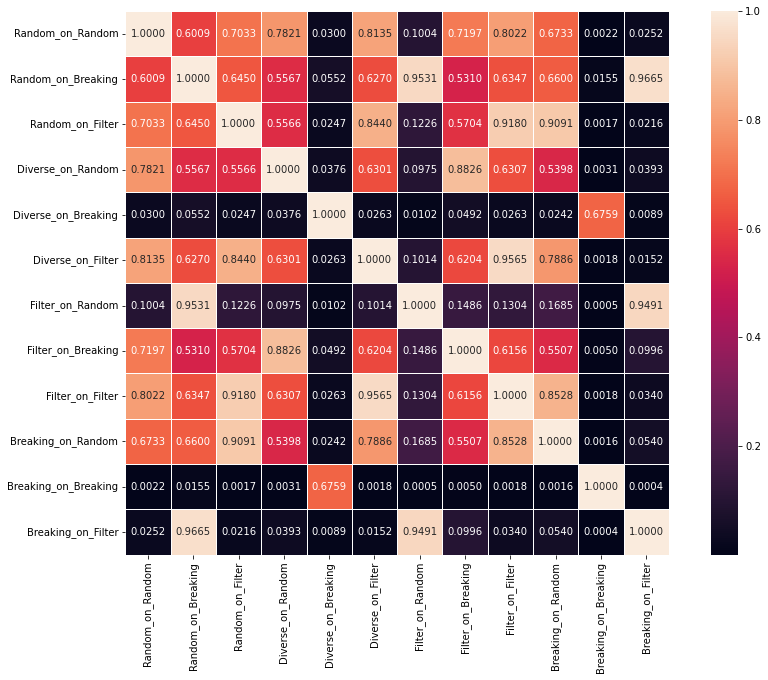

In [43]:
plt.subplots(figsize=(15, 10))
sns.heatmap(heatmap_df, linecolor="white",annot=True, fmt="2.4f", linewidth=1, annot_kws={'size': 10}, square=True)
plt.savefig("comparison_heatmap.png")